In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
USERS_FILE_PATH = './takehome_users.csv'
USER_ENGAGEMENT_FILE_PATH = './takehome_user_engagement.csv'

In [3]:
df_users = pd.read_csv(USERS_FILE_PATH, encoding='ISO-8859-1', index_col='object_id')
df_user_eng = pd.read_csv(USER_ENGAGEMENT_FILE_PATH)

In [4]:
# Convert unix timestamp to datetime
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')
df_users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  object        
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 937.5+ KB


In [6]:
# Convert time_stamp to datetime
df_user_eng['time_stamp'] = pd.to_datetime(df_user_eng['time_stamp'])
df_user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df_user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


# EDA

### Login counts over time

In [8]:
df_user_login_counts = df_user_eng.resample(rule='D', on='time_stamp').sum().drop('user_id', axis=1)

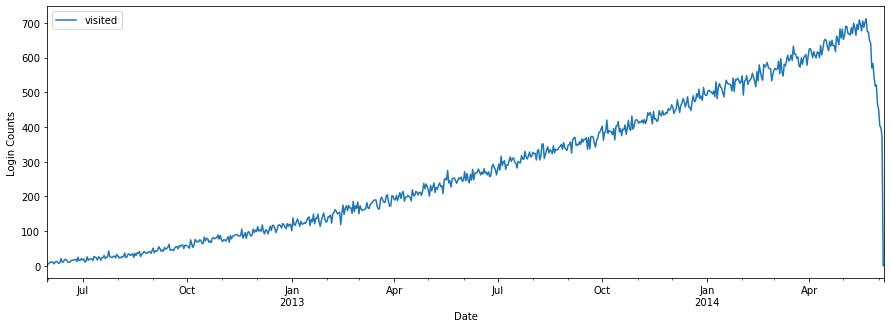

In [9]:
df_user_login_counts.plot(kind='line', figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Login Counts')
plt.show()

From the plot, the login counts drop significantly between May and June, 2014.

### Who invited most uesrs

In [10]:
df_invite_counts = df_users.groupby('invited_by_user_id').count().name
df_invite_counts.sort_values(ascending=False)

invited_by_user_id
10741.0    13
2527.0     12
2308.0     11
11770.0    11
1525.0     11
           ..
6313.0      1
6315.0      1
6328.0      1
6336.0      1
3.0         1
Name: name, Length: 2564, dtype: int64

In [11]:
n_users = df_users.shape[0]
n_inviter = df_invite_counts.shape[0]
ratio_invite = n_inviter / n_users
print('{:.1%} users have invited other users.'.format(ratio_invite))

21.4% users have invited other users.


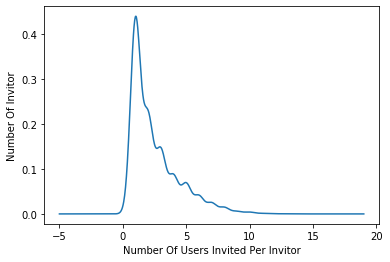

In [12]:
df_invite_counts.plot(kind='density')
plt.xlabel('Number Of Users Invited Per Invitor')
plt.ylabel('Number Of Invitor')
plt.show()

Most users only has invited 1 or 2 other users.

### Which organization has most users

In [13]:
df_org_user_counts = df_users.groupby('org_id').count().name
df_org_user_counts.sort_values(ascending=False)

org_id
0      319
1      233
2      201
3      168
4      159
      ... 
355      9
400      8
397      8
386      7
416      2
Name: name, Length: 417, dtype: int64

In [39]:
df_org_user_counts[413]

16

### Organization login counts over time

In [15]:
df_user_eng_merged = df_user_eng.merge(df_users, left_on='user_id', right_on='object_id')
df_user_eng_merged.head()

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


In [41]:
df_org_visits = df_user_eng_merged.groupby('org_id').sum()['visited']
df_org_visits

org_id
0      1390
1      2298
2      1967
3      1868
4      2064
       ... 
412       8
413     590
414     167
415     694
416       2
Name: visited, Length: 417, dtype: int64

Organization 0 has the most users, however, it doesn't have the most login counts.

Another interesting observation is that some orgnizations (413, 415) have quite significant login counts compared with the number of users they have.

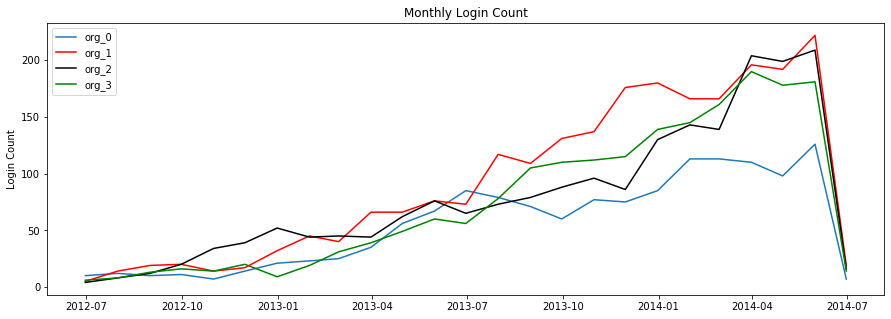

In [37]:
df_org_0_login_counts = df_user_eng_merged[df_user_eng_merged['org_id'] == 0].resample(rule='M', on='time_stamp').sum()
plt.figure(figsize=(15,5))
plt.plot(df_org_0_login_counts['visited'], label='org_0')

df_org_1_login_counts = df_user_eng_merged[df_user_eng_merged['org_id'] == 1].resample(rule='M', on='time_stamp').sum()
plt.plot(df_org_1_login_counts['visited'], color='r', label='org_1')

df_org_2_login_counts = df_user_eng_merged[df_user_eng_merged['org_id'] == 2].resample(rule='M', on='time_stamp').sum()
plt.plot(df_org_2_login_counts['visited'], color='black', label='org_2')

df_org_3_login_counts = df_user_eng_merged[df_user_eng_merged['org_id'] == 3].resample(rule='M', on='time_stamp').sum()
plt.plot(df_org_3_login_counts['visited'], color='g', label='org_3')

plt.title('Monthly Login Count')
plt.ylabel('Login Count')
plt.legend()
plt.show()

The number of logins drops significantly between May and June for all orgnizations.

There may be a technical issue happened that caused the decrease.

### Is there a correlation between the size of the orgnization and their login counts

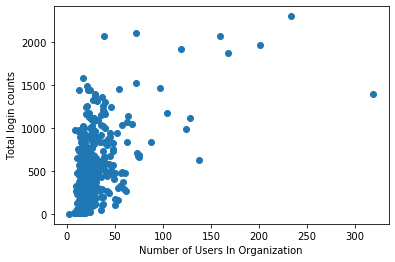

In [47]:
plt.scatter(df_org_user_counts, df_org_visits)
plt.xlabel('Number of Users In Organization')
plt.ylabel('Total login counts')
plt.show()

There is no observerable correlation from the plot, some small organizations also have a large amount of login.